In [69]:
from src.LatentSpace import LatentSpace
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import pandas as pd
import umap
import tqdm as notebook_tqdm
from sklearn.cluster import KMeans
import seaborn as sns


In [64]:
latent_space = LatentSpace(autoencoder_path='data/autoencoder_256dim_time_freq',
                        image_dir='data/Spotify/comp_pngs/',
                        tracks_feather_path='data/all_tracks.feather',
                        latent_dims=256
                        )

Found 278326 files for Generator set


In [65]:
latent_space.load('data/autoencoder_256dim_time_freq/')

In [66]:
data = latent_space.tracks[latent_space.latent_cols]

In [67]:
data

,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,...,latent_246,latent_247,latent_248,latent_249,latent_250,latent_251,latent_252,latent_253,latent_254,latent_255
0,1.715304,1.279687,0.336615,0.240566,-0.838821,-0.354146,-0.183431,-0.342370,-0.780337,0.583847,...,-0.922726,0.959561,1.364622,-1.840644,0.135359,-0.086966,-0.268230,0.869131,0.018014,-1.489359
1,-0.896752,-1.063230,0.388703,-0.903514,0.119015,0.476133,-0.318660,0.804670,0.716827,-0.787347,...,0.979757,-1.564499,-0.698463,-0.102872,-0.220536,0.113026,0.051805,-1.340857,-1.039616,-0.443429
2,-0.096473,0.713580,0.282319,-0.597762,-0.022279,0.593484,-0.582468,1.005506,-0.143677,0.092500,...,-0.703612,0.850913,-0.121042,-0.179759,0.652941,-0.020691,-0.482379,0.417722,-0.673634,-0.286881
3,0.563227,-0.130133,-0.373186,-0.728820,0.441710,-1.225824,0.491695,-0.502632,-0.990543,0.649863,...,0.986056,-2.240132,1.837446,2.925004,-0.791726,1.271631,-0.262034,0.017363,1.913442,0.779821
4,1.034573,-0.320779,1.064442,0.081217,0.508099,-0.290049,1.307548,0.288136,-0.649349,-1.482642,...,-0.385093,-0.680160,-0.027013,-0.555699,0.008795,0.710959,-0.797545,-0.515850,-0.358632,-0.209054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278299,0.834681,-0.178573,1.232183,0.413920,1.808286,0.171474,-0.102031,0.155117,2.445210,0.697333,...,3.017658,-0.456982,1.797869,-0.019775,-0.463933,-1.142548,-1.326799,1.389015,0.683730,0.316634
278300,0.344973,-0.119094,0.194339,0.056511,0.915672,1.281923,1.272135,0.516533,-0.222289,0.468104,...,0.551790,0.246473,0.557484,-0.708169,0.805270,-1.291365,1.275459,-1.626983,-1.484387,-4.117972
278301,-0.430780,0.818932,0.771326,-0.664749,-1.239419,-0.756373,1.218956,0.190034,0.252341,-0.707349,...,-0.996275,0.986957,0.780848,0.251633,-2.378895,0.790326,0.733439,0.522836,-0.276152,1.119686
278302,2.390452,-1.383227,-0.421956,-1.675885,1.830201,-0.714938,0.206817,1.799001,1.140910,-0.891647,...,-0.001909,-0.579427,-1.149254,1.091702,-1.631300,-2.155817,1.039823,-0.439607,-3.475483,-1.194716


In [107]:
embedding = umap.UMAP(n_neighbors=500, min_dist=.5).fit_transform(data)

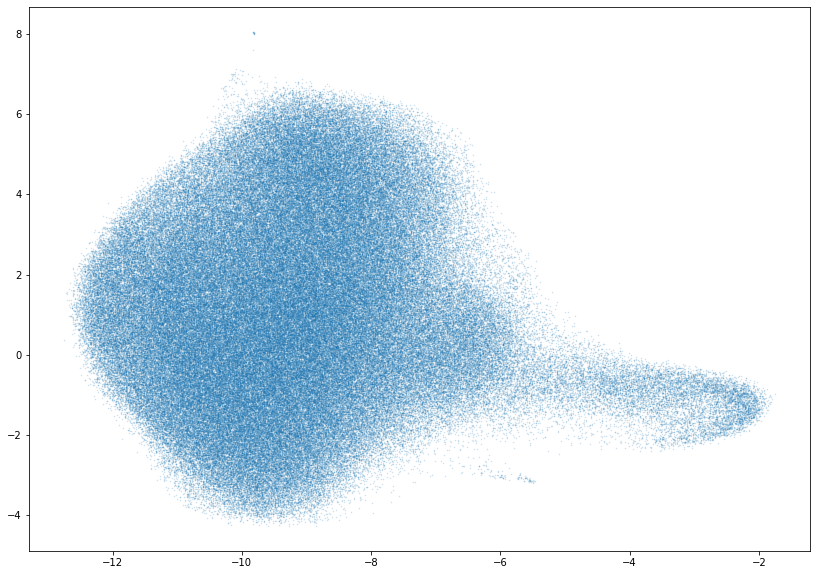

In [185]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, alpha=.2)

/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


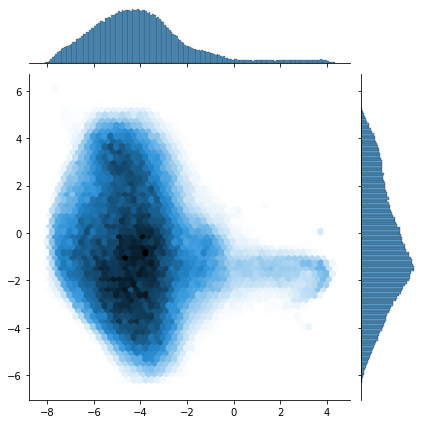

In [70]:
sns.jointplot(*embedding.T, kind='hex')

In [122]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
data_sample = data.sample(10000, random_state=42)
results=[]
kmeans_predictions = []
gmm_predictions = []
for k in range(2,100):
    kmeans = MiniBatchKMeans(n_clusters=k).fit(data_sample)
    gmm = GaussianMixture(n_components=k).fit(data_sample)
    predict = kmeans.predict(data_sample)
    gmm_predict = gmm.predict(data_sample)
    result = {
        'k':k,
        'inertia': kmeans.inertia_,
        'silhouette': silhouette_score(data_sample, predict),
        'silhouette_gmm': silhouette_score(data_sample, gmm_predict)
    }
    results.append(result)
    kmeans_predictions.append(predict)
    gmm_predictions.append(gmm_predict)
    print(result, end='\r')

In [123]:
cluster_results = pd.DataFrame(results)
cluster_results

,k,inertia,silhouette,silhouette_gmm
0,2,2435547.750,0.064619,0.088909
1,3,2395281.500,0.004259,0.075176
2,4,2231612.250,0.021825,0.040141
3,5,2185751.500,0.036693,0.011765
4,6,2185226.000,0.008282,0.011787
...,...,...,...,...
93,95,1900496.250,-0.083339,-0.020003
94,96,1889941.250,-0.101813,-0.021069
95,97,1894016.500,-0.104940,-0.024391
96,98,1898319.000,-0.077442,-0.023035


<AxesSubplot:>

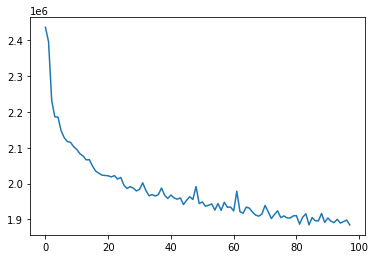

In [125]:
cluster_results.inertia.plot()

<AxesSubplot:>

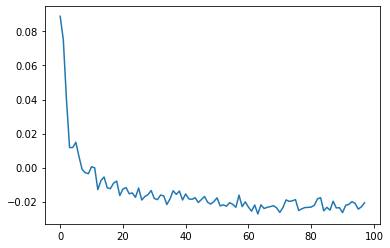

In [128]:
cluster_results.silhouette_gmm.plot()

In [131]:
embedding_sample = umap.UMAP(n_neighbors=500, min_dist=.5).fit_transform(data_sample)

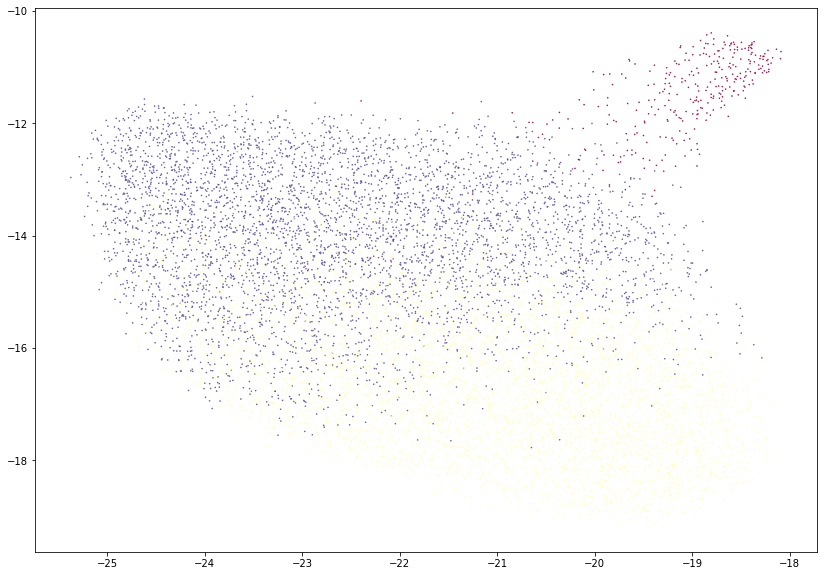

In [136]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding_sample.T, c=gmm_predictions[1], cmap='Spectral', s=0.3, alpha=1)

In [78]:
tracks = latent_space.tracks.copy()

In [79]:
tracks['predict'] = predict

In [74]:
gmm = GaussianMixture(n_components=4).fit(data)

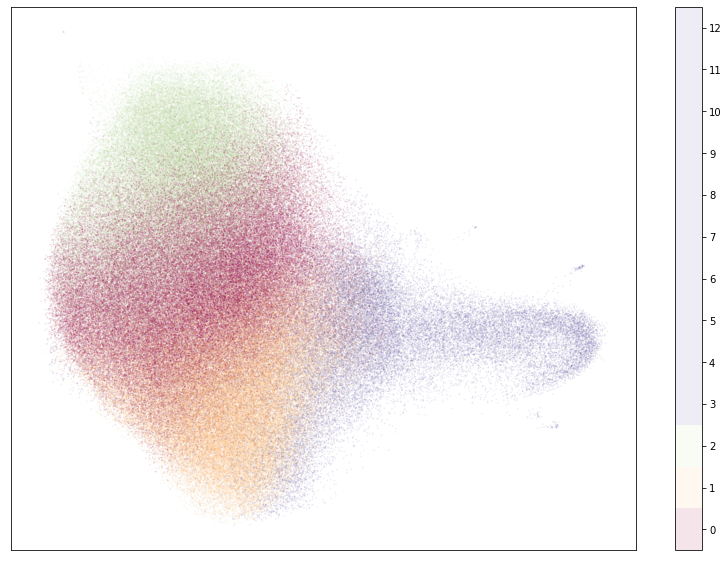

In [76]:
import numpy as np

gmm_predict = gmm.predict(data)
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, c=gmm_predict, cmap='Spectral', s=0.3, alpha=.1)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(14)-0.5)
cbar.set_ticks(np.arange(13))
cbar.set_ticklabels(np.arange(13))

In [80]:
tracks['gmm_predict'] = gmm_predict

In [82]:
tracks[tracks['gmm_predict'] == 3]

,id,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,...,track_preview_link,track_popularity,track_uri,artist_name,artist_id,artist_genres,artist_popularity,release_date,predict,gmm_predict
23,003NBNmetkhiKZptmLDXca,1.086568,1.070060,-1.177532,0.955112,-0.697391,1.842831,-0.709279,-0.149679,-0.129641,...,https://p.scdn.co/mp3-preview/10aa0afa3ad3feef...,17,spotify:track:003NBNmetkhiKZptmLDXca,Freescha,0TZfDwCnRJr7CmqjLTxVBu,"[deep idm, drill and bass, intelligent dance m...",23,2001-05-07,0,3
34,004Kabm8OZT5AdJaFHgKnu,1.077826,1.346877,-1.032933,-0.426254,1.950205,0.006716,0.631487,-1.871704,-1.038371,...,https://p.scdn.co/mp3-preview/5b6030a2cc6ca5b5...,5,spotify:track:004Kabm8OZT5AdJaFHgKnu,Adele Anthony,5yUp79jSBSGdkbufl2hmcY,[violin],21,2009-09-28,1,3
43,006WdVv3IMeA7svzCeT4UW,2.046961,0.009356,0.244093,-0.775460,0.589289,-0.785189,-0.362617,-1.026147,0.234321,...,https://p.scdn.co/mp3-preview/a5eb7288521ae4b8...,22,spotify:track:006WdVv3IMeA7svzCeT4UW,Pete Holmes,0H3gJcwMo5LSuwN6QuB5dz,[],20,None,1,3
55,00833ggguqB8BygRyjpKJh,0.174069,-0.643496,-0.853165,0.444114,-1.408460,0.897618,0.506677,-0.924352,0.479070,...,https://p.scdn.co/mp3-preview/4275a9e5e6addc53...,18,spotify:track:00833ggguqB8BygRyjpKJh,Unwoman,0ulEFrMUcWduqdVKegJZJF,"[cello, dark cabaret, modern cello, steampunk]",26,2013-04-23,1,3
57,00866RvSQtgoKudNm6qzmz,0.175344,-0.085317,-0.074784,1.886768,1.473543,2.179409,0.080806,-0.890678,2.385244,...,https://p.scdn.co/mp3-preview/0841c6d633baf56f...,37,spotify:track:00866RvSQtgoKudNm6qzmz,Clint Eastwood,5NfaORyb548xmt85LGHYFV,[classic soundtrack],36,2005-09-13,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278266,7zw0B7XKV89FFegTHDTj73,-0.884033,0.665329,-0.234179,-1.007190,0.657280,0.837646,-0.918024,-1.280839,0.097336,...,https://p.scdn.co/mp3-preview/15da3e0a9d08f9d2...,35,spotify:track:7zw0B7XKV89FFegTHDTj73,Maria Bamford,6s99GPG9mopI5PNippBKgO,[],28,None,1,3
278274,7zwgzu75g04y4AyQzbbroe,-0.102763,-0.414373,-2.423095,1.675241,1.940247,2.421259,-1.940517,-1.041159,-0.538376,...,https://p.scdn.co/mp3-preview/fb2a6ea93da15789...,31,spotify:track:7zwgzu75g04y4AyQzbbroe,Marisa Anderson,5j2d5CS0sh2LTpFsrKAFcW,"[american primitive, cascadia psych, drone fol...",38,2022-06-16,3,3
278284,7zxiDfb4TNf6YugX3F9hcH,1.013267,-0.880141,-1.673072,-0.635825,1.824562,-1.213248,-1.733055,-2.856546,-1.620106,...,https://p.scdn.co/mp3-preview/13aa58998d3270bd...,7,spotify:track:7zxiDfb4TNf6YugX3F9hcH,Kidz Now,3o46IjSjb7912SsuNsuE3k,[children's music],9,2010-06-29,1,3
278296,7zywm8GjLbBics0UyFFyo8,-0.616384,-0.163017,-1.723342,-0.340382,0.342782,1.906831,0.184310,-1.505114,1.028476,...,https://p.scdn.co/mp3-preview/bf633493ee78b220...,0,spotify:track:7zywm8GjLbBics0UyFFyo8,Franco Margola,0hgSoLdimVoKf7hEXdN0iH,"[classical, early modern classical]",3,2013-06-20,3,3


In [83]:
genre_embedding = umap.UMAP(n_neighbors=50, min_dist=.5).fit_transform(latent_space.genres[latent_space.latent_cols])

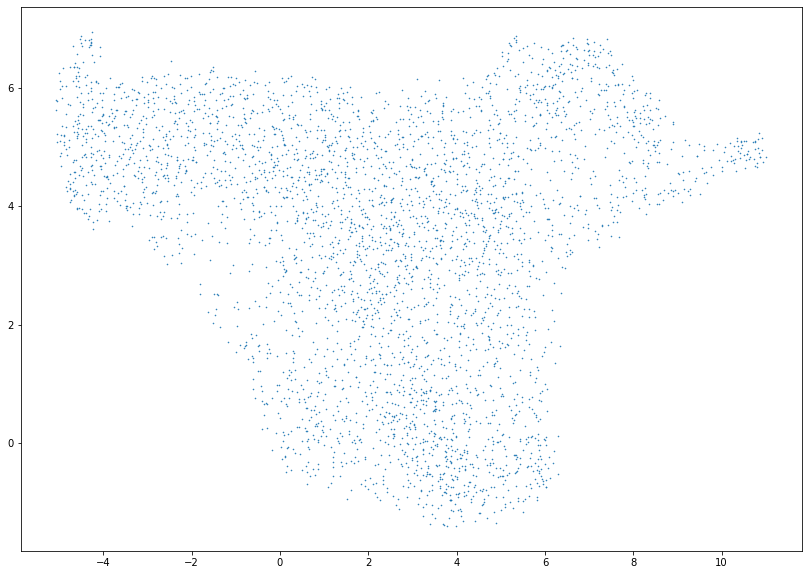

In [85]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*genre_embedding.T, s=0.3, alpha=1)

/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


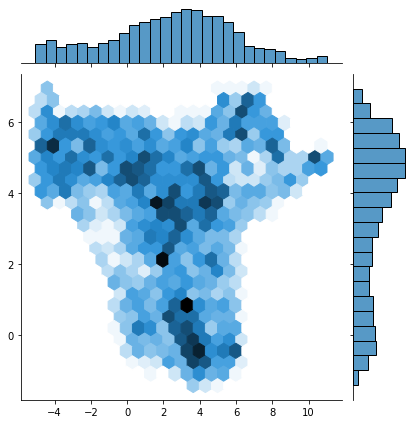

In [86]:
sns.jointplot(*genre_embedding.T, kind='hex')

In [180]:
from sklearn.metrics.pairwise import cosine_similarity

mean_vector = latent_space.tracks[latent_space.latent_cols].mean()
#mean_vector['latent_0'] = 1

similarity = cosine_similarity(np.array([mean_vector]), np.array(latent_space.tracks[latent_space.latent_cols]))

similarity_df = latent_space.tracks.copy()
similarity_df['similarity'] = similarity.T

most_similar = similarity_df.sort_values(by='similarity', ascending=False).reset_index()[:10]
most_similar[['track_uri','track_name','artist_name','artist_genres','similarity']]

,track_uri,track_name,artist_name,artist_genres,similarity
0,spotify:track:1788x4xlNC5GiIgLYglxMW,"Skeleton Appreciation Day in Vestal, NY (Bones)",Will Wood and the Tapeworms,[new jersey indie],2.763505e-08
1,spotify:track:2StLz1e2VTwCm8Jnkke7OF,耳わほう,麦吉_Maggie,[anime],2.568116e-08
2,spotify:track:4RaWbMItxVbuUExNkFsITP,La Jeepeta,Brray,"[reggaeton, reggaeton flow, trap latino]",2.503168e-08
3,spotify:track:56eegidC3Usq9cV8b9MXyn,Tejas,Cnvs,[indie queretano],2.470214e-08
4,spotify:track:3AmNrBG22JTzZWFoM60TgH,Bubble Hat (Live),Megaphone Man,[],2.432679e-08
5,spotify:track:3cXRNsgDzXoZFrOvxsXExK,Dawning Of The Day,Starcastle,"[art rock, neo-progressive, progressive rock, ...",2.387217e-08
6,spotify:track:4ShXDbRgVbWAg0dkhIhvkk,Kogu tõde jüriööst,Lenna,[estonian pop],2.380680e-08
7,spotify:track:35o9kIkPKgolXQFxOcupPf,I Can't Wait x Tak Bisa Bersama,Vidi Aldiano,"[indonesian pop, indonesian r&b]",2.375932e-08
8,spotify:track:07TCsoqZkWJcMnhmD5T7ou,Doctor Watching,I Got You On Tape,[danish alternative rock],2.373085e-08
9,spotify:track:3tBWIdZOqfdDCntVNAMhfM,ミラクル・ガール (YAWARA!),Yuko Koura,[],2.369494e-08


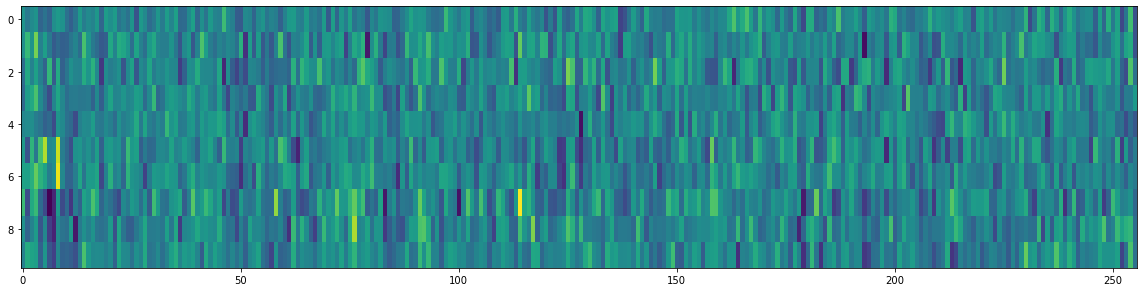

In [181]:
plt.figure(figsize=(20,5))
plt.imshow(np.array(most_similar[latent_space.latent_cols]),aspect=6)

In [182]:
latent_space.tracks[latent_space.tracks.artist_name.str.contains('Pérez Prado')][['track_id','track_name','artist_name']]

,track_id,track_name,artist_name
57953,1caIyurPdAPvl9kUyNfwir,Cerezo Rosa - Remastered,Pérez Prado
68623,1uwSOYXZoxgSqhn8FIkfH1,Que Rico Mambo,Pérez Prado
93410,2bwhOdCOLgQ8v6xStAqnju,Patricia,Pérez Prado
131130,3fQLXoRwKQTnThncdMCqwG,Mambo No 5,Pérez Prado
148651,4A0iCzLqX0bmDuDq1YAT59,El Manicero,Pérez Prado
188065,5GSxiQq6wuTKUTZqw73L99,Norma la de Guadalajara,Pérez Prado


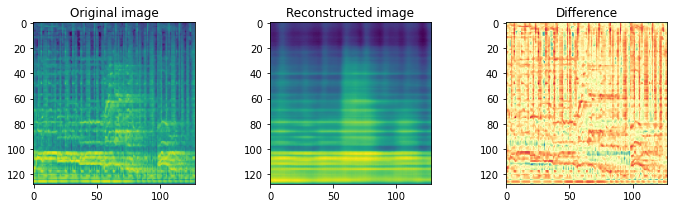

,index,track_name,artist_name,track_uri,similarity
0,93410,Patricia,Pérez Prado,spotify:track:2bwhOdCOLgQ8v6xStAqnju,1.000000
1,69795,不再挂念 - DJR7版伴奏,胡芳芳,spotify:track:1x0XJAfmWEHXZ0iYGQPR3T,0.541831
2,188340,Discover Masters,Beautiful Affair,spotify:track:5GvZfmEkVzIO1pW674DkZV,0.501858
3,80314,Coming In Hot - Wuki Remix,Wuki,spotify:track:2F9jc4l18skWHn6GsjbN5L,0.497860
4,278237,Without Me,Postcards & Polaroids,spotify:track:7zsC3MRs9FgcloMoctORr9,0.482434
5,82954,Solid Session - First State Remix,Mac & Mac,spotify:track:2JplIzF71EoTDR69B7YZoW,0.480734
6,110177,Castle of Mind,Electro Theory,spotify:track:3544PjkCMFQfUmFLmnRlk0,0.479634
7,133504,Gereja Tua,Panbers,spotify:track:3jjE0w559CEEwc9uFg1FNw,0.475916
8,27698,Espera,Anna Tréa,spotify:track:0mAnqGDjabZ67EnNcuNJ9g,0.469492
9,273946,Strange Things,Corrupt (UK),spotify:track:7shZDHe9GSdnzuLbGGtVXf,0.464332


,artist_name,similarity
0,MPH,0.476022
1,Opanka,0.467462
2,Postcards & Polaroids,0.436943
3,Echomen,0.419982
4,MMYYKK,0.413750
5,Gerald Mitchell,0.412558
6,Pauline Croze,0.411441
7,ERP,0.408851
8,EME BE,0.408599
9,Seaforth,0.408135


,genre,similarity
0,ugandan pop,0.380709
1,brazilian tech house,0.379878
2,swedish soul,0.355717
3,smooth soul,0.348024
4,contemporary r&b,0.347746
5,kabyle,0.336221
6,classic danish pop,0.335935
7,electric bass,0.329844
8,italian lounge,0.325061
9,nova musica maranhense,0.324531


In [183]:
seed = 93410
latent_space.plot_reconstruction(seed)
display(latent_space.get_similar_tracks_by_index(seed))
display(latent_space.get_similar_artists_by_index(seed))
display(latent_space.get_similar_genres_by_index(seed))